In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('filtered_sets/only_nading_matchups.csv')

#df = pd.read_csv('filtered_sets/player_averages.csv')
name = np.array(['Free_Throw%', 'Field_Goal%', '2pt%', '3pt%'])#, 'Iso', 'Pick', 'Post', 'Offball', 'AT_Ratio', 'TT_ratio'])#, 'TP_Ratio', 'SQavg'])
top = np.array(['ft_player', 'fg', 'empty', 'fg3'])#, 'iso_pts', 'pick_pts', 'post_pts', 'offBall_pts', 'tov', 'tov'])#, 'tov', 'qsq'])
bottom = np.array(['fta', 'fga', 'empty', 'fga3'])#, 'iso_actions', 'pick_actions', 'post_actions', 'offBall_actions', 'assistOppCreated', 'touches'])#, 'poss', 'poss'])

In [60]:
def create_stats_column(df, i, top=top, bottom=bottom, multi_var=False):
    top = top[i]
    bottom = bottom[i]
    row = np.zeros(0, dtype=float)
    for j in range(np.shape(df)[0]):
        if(multi_var):
            #print('2pt%' if name[i] != '2pt%' else 'multi')
            num = df['fg'].iloc[j] - df['fg3'].iloc[j]
            denom = df['fga'].iloc[j] - df['fga3'].iloc[j]
            result = num/denom
        else:
            result = df[f'{top}'].iloc[j]/df[f'{bottom}'].iloc[j]
        row = np.append(row, [result])
    return row

def update_df(df, top=top, bottom=bottom):
    for i in range(len(name)):
        name_temp = name[i]
        #print(name_temp, name[i])
        data = pd.DataFrame({f'{name_temp}': create_stats_column(df, i, top, bottom, multi_var=(True if name[i] == '2pt%' else False))})
        df = pd.concat([df, data], axis=1)
    print(np.shape(df))
    return df

In [62]:
nd = update_df(df.copy())
nd3pt = nd[nd['3pt%'] > 0.01]
nd2pt = nd[nd['2pt%'] > 0.01]
#df[['player_defMatchup_a', 'player_defMatchup_ht', 'Free_Throw%', '2pt%', '3pt%']].head(30)

C:\Users\milleraa\AppData\Local\Temp\ipykernel_9656\3145555192.py:12: RuntimeWarning: invalid value encountered in scalar divide
  result = df[f'{top}'].iloc[j]/df[f'{bottom}'].iloc[j]
C:\Users\milleraa\AppData\Local\Temp\ipykernel_9656\3145555192.py:10: RuntimeWarning: invalid value encountered in scalar divide
  result = num/denom
C:\Users\milleraa\AppData\Local\Temp\ipykernel_9656\3145555192.py:12: RuntimeWarning: invalid value encountered in scalar divide
  result = df[f'{top}'].iloc[j]/df[f'{bottom}'].iloc[j]


(1669, 35)


In [54]:
nd2pt[['player_defMatchup_a', 'player_defMatchup_ht', 'Free_Throw%', '2pt%', '3pt%', 'touches_time']].head()

,player_defMatchup_a,player_defMatchup_ht,Free_Throw%,2pt%,3pt%,touches_time


In [51]:
nd3pt[['player_defMatchup_a', 'player_defMatchup_ht', 'Free_Throw%', '2pt%', '3pt%']].head()

,player_defMatchup_a,player_defMatchup_ht,Free_Throw%,2pt%,3pt%
6,"Lapointe, Uriah",81,NaN,NaN,1.0
8,"House, Brandyn",76,NaN,NaN,1.0
21,"Lawton, Jeremiah",81,NaN,NaN,1.0
38,"Morser, Cheyenne",79,NaN,NaN,1.0
79,"Morser, Cheyenne",79,NaN,NaN,1.0


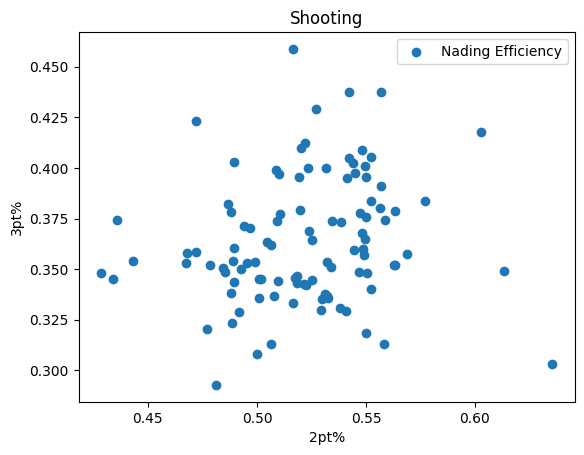

In [27]:
# Set the figure size in inches
#plt.figure(figsize=(10,6))

x_2pt = nd2pt
x_3pt = nd3pt

y_val = df[['3pt%']]

plt.scatter(x_val, y_val, label = "Nading Efficiency" )

#x = np.array([0, .1, .2, .3])
#y1 = np.array([0.8, 0.8, 0.2, 0.2])
#y2 = np.array([0, 0, 1, 1])

#plt.plot(x, y1, 'o--')
#plt.plot(x, y2, 'o--')
#plt.fill_between(x, y1, y2, where=(y1 > y2), color='C0', alpha=0.3)
#plt.fill_between(x, y1, y2, where=(y1 < y2), color='C1', alpha=0.3)

# Set x and y axes labels
plt.xlabel('2pt%')
plt.ylabel('3pt%')

plt.title('Shooting')
plt.legend()
plt.show()